# SSP Tactile Encoding
This demo illuistrates the memorization and replay of spatial tactile perception.

In [1]:
%matplotlib widget

import numpy as np
from IPython.display import HTML

from ssp.maps import Spatial2D
from ssp.plots import create_gif, heatmap_animation
from ssp.utils import interpolate, linear_steps


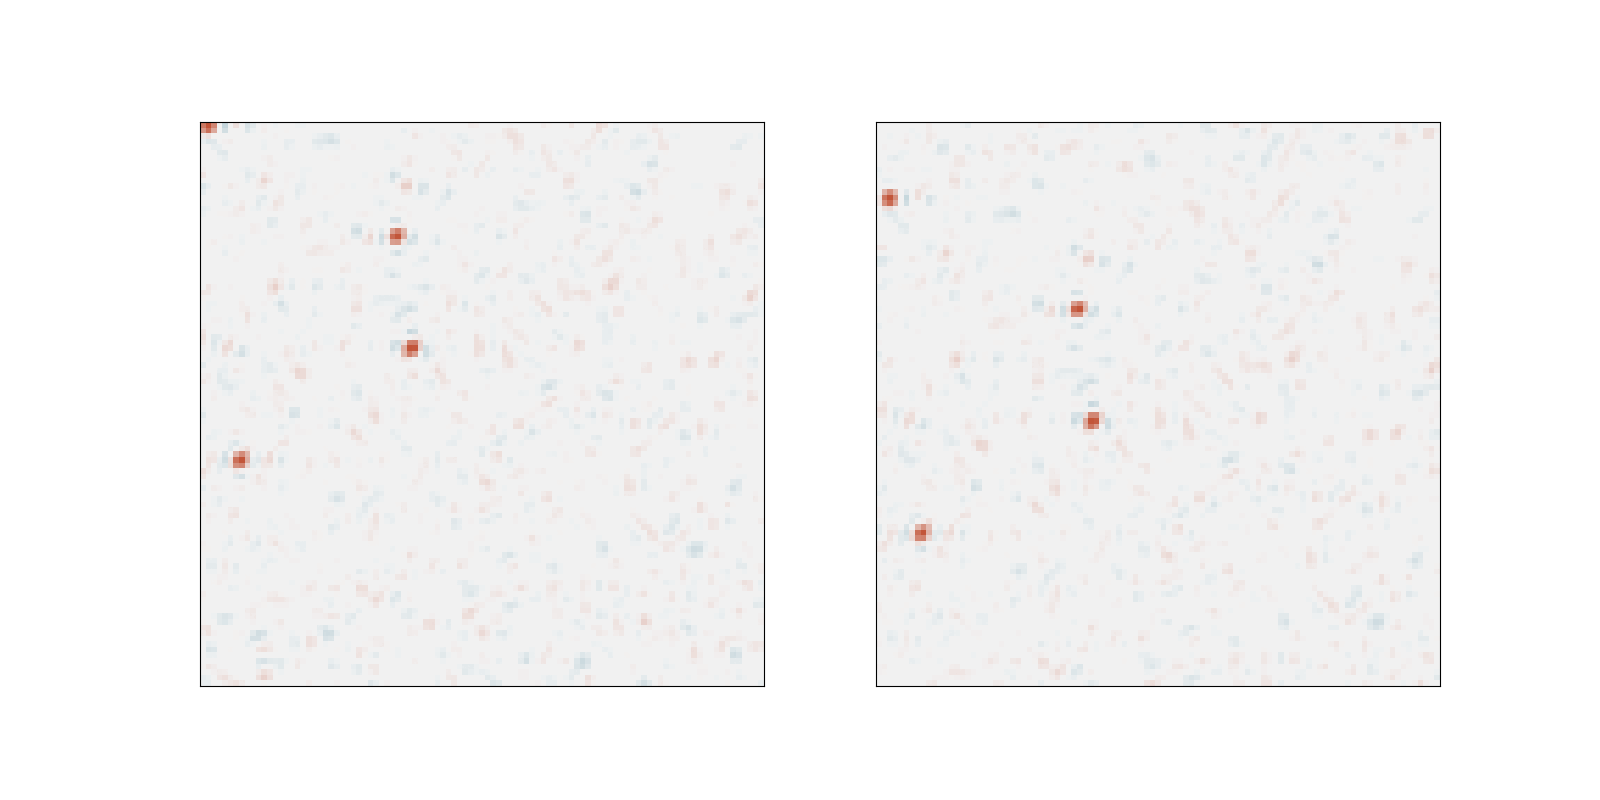

In [9]:
dim = 1024
scale = 10

T = 5
dt = 0.05

x_len = 5
y_len = 5
x_spaces = 101
y_spaces = 101

ssp_map = Spatial2D(dim=dim, scale=scale)
ssp_map.build_grid(x_len, y_len, x_spaces, y_spaces)

# define some functions to specify simple dynamics
dxdt = lambda t: 10 * np.sin(t * np.pi)
dydt = lambda t: 10 * np.cos(t * np.pi)

# define starting point
ssp = ssp_map.encode_points(np.arange(5), 2*np.sin(np.arange(5)))

simple_sims = []
for delta in ssp_map.simple_dynamics_gen(T, dt, dxdt, dydt):
    ssp *= delta
    simple_sims.append(ssp_map.compute_heatmap(ssp))

# define some more complex dynamics (gravity in this case)
d2xdt = lambda t: np.zeros(len(t))
d2ydt = lambda t: -10 * np.ones(len(t))

complex_sims = []
for delta in ssp_map.complex_dynamics_gen(T, dt, vx=5, vy=20, d2xdt=d2xdt, d2ydt=d2ydt):
    ssp *= delta
    complex_sims.append(ssp_map.compute_heatmap(ssp))

# plot SSP representations for comparison
n_plots = 2
n_steps = int(T / dt)
figsize = (16, 8)
sims = [simple_sims, complex_sims]

ani = heatmap_animation(sims, figsize=figsize)
HTML('<img src="data:image/gif;base64,{0}" />'.format(create_gif(ani)))